<a href="https://colab.research.google.com/github/martin-timothy/submission-proyek-analisis-data-dengan-python/blob/main/Submission_Dicoding_Martin_Timothy_Hutajulu_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: PRSA_Data_Changping_20130301-20170228.csv & PRSA_Data_Shunyi_20130301-20170228.csv
- **Nama: Martin Timothy Hutajulu**
- **Email: martintimothyh@gmail.com**
- **ID Dicoding: timothymartin15**

## 1. Menentukan Pertanyaan Bisnis

- Bagaimana Kualitas Udara di Kota Changping setiap tahunnya?
- Bagaimana Kualitas Udara di Kota Shunyi setiap tahunnya?
- Apa sumber polutan tertinggi yang dihasilkan di Kota Changping?
- Apa sumber polutan tertinggi yang dihasilkan di Kota Shunyi?
- Berdasarkan informasi yang didapat sebelumnya dan geografisnya apakah ada persamaan dan perbedaan polusi udara yang terjadi di Kota Changping dan Shunyi?

## 2. Mengimport semua library yang dibutuhkan

In [1]:
# Mengimport semua library yang dibutuhkan untuk menjawab pertanyaan bisnis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Wrangling

### Gathering Data

In [2]:
# Memuat dataset changping yang telah diupload
changping_data = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')
changping_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [3]:
# Memuat dataset shunyi yang telah diupload
shunyi_data = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')
shunyi_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

In [4]:
# Memeriksa jumlah baris dan kolom pada dataset changping
changping_data.shape

(35064, 18)

didapatkan pada dataset changping terdapat 35064 baris dan 18 kolom.

In [5]:
# Memeriksa jumlah baris dan kolom pada dataset shunyi
shunyi_data.shape

(35064, 18)

sama dengan dataset changping, dataset pada shunyi terdapat 35064 baris dan 18 kolom.

In [6]:
# Memeriksa tipe data changping pada setiap kolom
changping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
# Memeriksa tipe data shunyi pada setiap kolom
shunyi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
# Memeriksa missing value pada dataset changping
changping_data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [9]:
# Memeriksa missing value pada dataset shunyi
shunyi_data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


In [10]:
# Memeriksa duplikat data pada dataset changping
changping_data.duplicated().sum()

0

In [11]:
# Memeriksa duplikat data pada dataset shunyi
shunyi_data.duplicated().sum()

0

In [12]:
# Memeriksa parameter statistik pada dataset changping
changping_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Berdasarkan parameter statistik pada dataset changping didapatkan :

PM2.5 rata-rata : 71,

PM10 rata-rata : 94.6,

SO2 rata-rata : 14.9,

NO2 rata-rata : 44.1,

CO rata-rata : 1152.3,

O3 rata-rata : 57.9

In [13]:
# Memeriksa parameter statistik pada dataset shunyi
shunyi_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Berdasarkan parameter statistik pada dataset shunyi didapatkan :

PM2.5 rata-rata : 79.49,

PM10 rata-rata : 98.7,

SO2 rata-rata : 13.5,

NO2 rata-rata : 43.9,

CO rata-rata : 1187,

O3 rata-rata : 57.9

### Cleaning Data

In [14]:
# Menghapus kolom 'No' pada dataset changping dikarenakan tidak dibutuhkan
changping_data.drop(changping_data.columns[[0]], axis=1, inplace=True)
changping_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [15]:
# Menghapus kolom 'No' pada dataset shunyi dikarenakan tidak dibutuhkan
shunyi_data.drop(shunyi_data.columns[[0]], axis=1, inplace=True)
shunyi_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [16]:
# Menghapus missing value yang terdapat pada dataset changping
changping_data.dropna(inplace=True)

In [17]:
# Menghapus missing value yang terdapat pada dataset shunyi
shunyi_data.dropna(inplace=True)

In [18]:
# Membuat kolom datetime menggunakan kolom year, kolom month, kolom day, dan kolom hour pada dataset changping
changping_data['datetime'] = pd.to_datetime(changping_data[['year', 'month', 'day', 'hour']])
changping_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [19]:
# Membuat kolom datetime menggunakan kolom year, kolom month, dan kolom hour pada dataset shunyi
shunyi_data['datetime'] = pd.to_datetime(shunyi_data[['year', 'month', 'day','hour']])
shunyi_data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,2013-03-01 00:00:00
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi,2013-03-01 01:00:00
5,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,Shunyi,2013-03-01 05:00:00
6,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,NNE,1.6,Shunyi,2013-03-01 06:00:00
7,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,NE,1.7,Shunyi,2013-03-01 07:00:00


## 4. Exploratory Data Analysis (EDA)

In [20]:
# Melihat rangkuman parameter statistik dari dataset changping yang telah dibersihkan
changping_data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681
mean,2014.703130,6.507481,15.715156,11.506992,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,1.865757,2015-03-15 19:34:10.769560320
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000,2013-03-01 00:00:00
25%,2014.000000,3.000000,8.000000,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,15.000000,3.100000,999.500000,-10.600000,0.000000,1.000000,2014-03-26 23:00:00
50%,2015.000000,7.000000,16.000000,11.000000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.100000,1007.700000,1.100000,0.000000,1.500000,2015-03-17 05:00:00
75%,2016.000000,10.000000,23.000000,18.000000,99.000000,130.000000,18.000000,61.000000,1400.000000,79.000000,23.100000,1016.300000,13.900000,0.000000,2.300000,2016-03-11 01:00:00
max,2017.000000,12.000000,31.000000,23.000000,662.000000,992.000000,310.000000,208.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000,2017-02-28 23:00:00
std,1.165678,3.478965,8.729951,6.940587,70.955607,82.610340,21.057574,29.591375,1105.646637,53.792603,11.393462,10.177785,13.841226,0.765286,1.308218,NaN


Setelah dataset dibersihkan maka berdasarkan parameter statistik pada dataset changping didapatkan :

PM2.5 rata-rata : 70.3,

PM10 rata-rata : 94,

SO2 rata-rata : 15,

NO2 rata-rata : 44.3,

CO rata-rata : 1151.7,

O3 rata-rata : 57.9

In [21]:
# Melihat rangkuman parameter statistik dari dataset shunyi yang telah dibersihkan
shunyi_data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194
mean,2014.672286,6.477214,15.797244,11.750447,79.400725,99.380546,14.144105,44.838483,1201.778267,55.297919,12.787637,1013.648045,1.542873,0.055150,1.842306,2015-03-03 17:18:32.048751360
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000,2013-03-01 00:00:00
25%,2014.000000,3.000000,8.000000,6.000000,19.000000,31.000000,2.000000,20.000000,400.000000,11.000000,2.500000,1005.400000,-9.600000,0.000000,1.000000,2014-03-14 11:15:00
50%,2015.000000,6.000000,16.000000,12.000000,55.000000,77.000000,5.000000,38.000000,900.000000,44.000000,13.300000,1013.400000,1.400000,0.000000,1.500000,2015-03-04 14:30:00
75%,2016.000000,10.000000,23.000000,18.000000,111.000000,140.000000,18.000000,63.000000,1500.000000,77.000000,22.600000,1021.600000,14.100000,0.000000,2.300000,2016-02-11 23:45:00
max,2017.000000,12.000000,31.000000,23.000000,762.000000,999.000000,207.000000,258.000000,10000.000000,340.000000,39.000000,1042.800000,27.500000,37.300000,12.800000,2017-02-28 23:00:00
std,1.162176,3.531983,8.782419,6.881524,81.222687,89.806815,20.111407,30.988580,1157.599187,54.106029,11.451568,10.120229,13.657590,0.711516,1.294560,NaN


Setelah dataset dibersihkan maka berdasarkan parameter statistik pada dataset changping didapatkan :

PM2.5 rata-rata : 79.4,

PM10 rata-rata : 99.3,

SO2 rata-rata : 14.1,

NO2 rata-rata : 44.8,

CO rata-rata : 1201.7,

O3 rata-rata : 55.2

In [22]:
# Memeriksa tren PM2.5 dan PM10 di Kota Changping pada tahun 2013 - 2017
changping_data.groupby(by='year').agg({"PM2.5":["max", "min", "mean"], "PM10":["max", "min", "mean"]})

PM2.5                   PM10                 
        max  min       mean    max  min        mean
year                                               
2013  443.0  3.0  70.793076  653.0  2.0   90.422623
2014  581.0  3.0  79.005075  858.0  3.0  106.122316
2015  500.0  3.0  69.377287  992.0  3.0   93.497604
2016  492.0  3.0  60.837451  933.0  3.0   85.564015
2017  662.0  3.0  79.469373  775.0  5.0   93.792620

Didapatkan hasil tren PM2.5 dan PM10 pada Kota Changping :

nilai max tertinggi PM2.5 terjadi pada tahun 2017, sedangkan nilai max tertinggi PM10 terjadi pada tahun 2015.

nilai rata-rata tertinggi PM2.5 terjadi pada tahun 2017, sedangkan rata-rata tertinggi PM10 terjadi pada tahun 2014

In [23]:
# Memeriksa tren PM2.5 dan PM10 di Kota Shunyi pada tahun 2013 - 2017
shunyi_data.groupby(by='year').agg({"PM2.5":["max", "min", "mean"], "PM10":["max", "min", "mean"]})

PM2.5                   PM10                 
        max  min       mean    max  min        mean
year                                               
2013  558.0  3.0  78.597429  764.0  2.0   98.928202
2014  592.0  3.0  84.546379  903.0  3.0  110.994835
2015  689.0  3.0  80.527901  999.0  3.0   99.289145
2016  707.0  3.0  71.076625  917.0  3.0   86.734100
2017  762.0  2.0  92.013997  951.0  3.0  103.431571

Didapatkan hasil tren PM2.5 dan PM10 pada Kota Shunyi :

nilai max tertinggi PM2.5 terjadi pada tahun 2017, sedangkan nilai max tertinggi PM10 terjadi pada tahun 2015.

nilai rata-rata tertinggi PM2.5 terjadi pada tahun 2017, sedangkan rata-rata tertinggi PM10 terjadi pada tahun 2014

In [24]:
# memeriksa tren so2, no2, co, o3 di kota changping pada tahun 2013 - 2017
changping_data.groupby(by='year').agg({"SO2":["max", "min", "mean"], "NO2":["max", "min", "mean"], "CO":["max", "min", "mean"], "O3":["max", "min", "mean"]})

SO2                    NO2                       CO         \
        max  min       mean    max  min       mean      max    min   
year                                                                 
2013  165.0  1.0  20.627632  199.0  2.0  41.713783   8100.0  100.0   
2014  235.0  2.0  20.930534  195.0  2.0  45.612202  10000.0  100.0   
2015  310.0  2.0  11.789714  199.0  2.0  42.620002   9900.0  100.0   
2016  119.0  2.0   8.117626  208.0  2.0  45.568270  10000.0  100.0   
2017  111.0  2.0  16.511439  203.0  2.0  50.979336   9900.0  100.0   

                      O3                     
             mean    max     min       mean  
year                                         
2013  1042.141832  429.0  0.2142  60.441771  
2014  1192.501500  366.0  1.0000  62.456329  
2015  1161.483543  359.0  2.0000  57.671939  
2016  1121.941128  327.0  2.0000  53.836624  
2017  1534.022140  148.0  1.0000  33.405166

Didapatkan hasil tren SO2, NO2, CO, O3 pada Kota Changping :

nilai max tertinggi SO2 terjadi pada tahun 2015, sedangkan nilai max tertinggi NO2 terjadi pada tahun 2016, nilai max tertinggi CO terjadi pada tahun 2014 dan 2016, serta nilai max tertinggi O3 terjadi pada tahun 2013.

nilai rata-rata tertinggi SO2 terjadi pada tahun 2014, sedangkan rata-rata tertinggi NO2 terjadi pada tahun 2014, nilai rata-rata tertinggi CO terjadi pada tahun 2017, nilai rata-rata tertinggi O3 terjadi pada tahun 2014.

In [25]:
# memeriksa tren so2, no2, co, o3 di kota shunyi pada tahun 2013 - 2017
shunyi_data.groupby(by='year').agg({"SO2":["max", "min", "mean"], "NO2":["max", "min", "mean"], "CO":["max", "min", "mean"], "O3":["max", "min", "mean"]})

SO2                    NO2                       CO         \
        max  min       mean    max  min       mean      max    min   
year                                                                 
2013  167.0  1.0  16.762732  204.0  2.0  44.027594   8700.0  100.0   
2014  207.0  1.0  18.315027  204.0  2.0  46.588931   7600.0  100.0   
2015  160.0  2.0  10.713794  238.0  2.0  43.479315  10000.0  100.0   
2016  203.0  2.0  10.167383  195.0  2.0  43.634890   9900.0  100.0   
2017  157.0  2.0  20.601866  258.0  2.0  53.331260   9600.0  100.0   

                      O3                     
             mean    max     min       mean  
year                                         
2013  1248.537819  301.0  0.2142  53.195304  
2014  1189.449779  333.0  1.0000  56.896509  
2015  1181.678339  340.0  2.0000  54.071811  
2016  1108.285991  339.0  1.0000  58.772482  
2017  1707.542768  173.0  1.0000  43.635303

Didapatkan hasil tren SO2, NO2, CO, O3 pada Kota Shunyi :

nilai max tertinggi SO2 terjadi pada tahun 2014, sedangkan nilai max tertinggi NO2 terjadi pada tahun 2017, nilai max tertinggi CO terjadi pada tahun 2015, serta nilai max tertinggi O3 terjadi pada tahun 2015.

nilai rata-rata tertinggi SO2 terjadi pada tahun 2017, sedangkan rata-rata tertinggi NO2 terjadi pada tahun 2017, nilai rata-rata tertinggi CO terjadi pada tahun 2017, nilai rata-rata tertinggi O3 terjadi pada tahun 2014.

In [26]:
# Memeriksa tren PM2.5 dan PM10 di kota changping pada keseluruhan bulan pada tahun 2014
changping_month_in2014 = changping_data[changping_data['year'] == 2014]
changping_month = changping_month_in2014.groupby(by='month').agg({"PM2.5":["mean"], "PM10":["mean"]})
changping_month

,PM2.5,PM10
,mean,mean
month,,
1,89.951613,110.934018
2,135.291598,142.453048
3,85.619891,128.085831
4,104.129032,142.600614
5,54.259016,101.053962
6,45.194444,59.989766
7,84.299845,97.729521
8,56.610094,76.057201


Pada tren PM2.5 dan PM10 pada tahun 2013 - 2017 di Kota Changping, didapatkan pada tahun 2014 nilai rata-rata PM10 menjadi yang tertinggi. Oleh karena itu, Kita ingin melihat tren PM10 pada setiap bulan di tahun 2014, didapatkan hasilnya PM10 menjadi tertinggi di bulan ke-4, Sedangkan PM2.5 menjadi tertinggi di bulan ke-2.

In [27]:
# Memeriksa tren PM2.5 dan PM10 di kota changping pada keseluruhan bulan pada tahun 2017
changping_month_in2017 = changping_data[changping_data['year'] == 2017]
changping_month = changping_month_in2017.groupby(by='month').agg({"PM2.5":["mean"], "PM10":["mean"]})
changping_month

,PM2.5,PM10
,mean,mean
month,,
1,97.633523,113.340909
2,59.826421,72.652842


Pada tren PM2.5 dan PM10 pada tahun 2013 - 2017 di Kota Changping, didapatkan pada tahun 2017 nilai rata-rata menjadi tertinggi. Oleh karena itu, kita ingin melihat tren PM2.5 pada setiap bulan di tahun 2017. Alhasil didapatkan PM2.5 serta PM10 menjadi tertinggi di bulan ke-1.

In [28]:
# Memeriksa tren PM2.5 dan PM10 kota shunyi pada keseluruhan bulan pada tahun 2014
shunyi_month_in2014 = shunyi_data[shunyi_data['year'] == 2014]
shunyi_month = shunyi_month_in2014.groupby(by='month').agg({"PM2.5":["mean"], "PM10":["mean"]})
shunyi_month

,PM2.5,PM10
,mean,mean
month,,
1,94.704125,114.207681
2,150.736568,146.010399
3,96.013139,132.195620
4,88.140173,140.108382
5,50.042697,91.641011
6,56.467875,75.657331
7,95.515656,113.185049
8,62.489773,83.506250


Bersamaan dengan Kota Changping, begitu juga dengan Kota Shunyi didapatkan tren PM2.5 dan PM10 pada tahun 2013-2017, pada tahun 2014 PM10 menjadi yang tertinggi. Oleh karena itu, didapatkan PM10 dan PM2.5 menjadi tertinggi di bulan ke-2.

In [29]:
# Memeriksa tren PM2.5 dan PM10 kota shunyi pada keseluruhan bulan pada tahun 2017
shunyi_month_in2017 = shunyi_data[shunyi_data['year'] == 2017]
shunyi_month = shunyi_month_in2017.groupby(by='month').agg({"PM2.5":["mean"], "PM10":["mean"]})
shunyi_month

,PM2.5,PM10
,mean,mean
month,,
1,114.425305,127.414634
2,68.677778,78.458730


Bersamaan dengan Kota Changping, begitu juga dengan Kota Shunyi didapatkan tren PM2.5 dan PM10 pada tahun 2013-2017, pada tahun 2017 PM2.5 menjadi yang tertinggi. Oleh karena itu, didapatkan PM10 dan PM2.5 menjadi tertinggi di bulan ke-1.

In [30]:
# memeriksa tren so2, no2, co, o3 kota changping pada keseluruhan bulan pada tahun 2013 - 2017
changping_data.groupby(by='month').agg({"SO2":["max", "min", "mean"], "NO2":["max", "min", "mean"], "CO":["max", "min", "mean"], "O3":["max", "min", "mean"]})

SO2                    NO2                       CO         \
         max  min       mean    max  min       mean      max    min   
month                                                                 
1      235.0  2.0  32.120647  203.0  2.0  57.790784  10000.0  100.0   
2      192.0  2.0  28.924065  208.0  2.0  48.219626   9800.0  100.0   
3      310.0  2.0  25.714505  199.0  2.0  55.118375   6500.0  200.0   
4      103.0  2.0  11.457490  153.0  2.0  41.370995   3500.0  100.0   
5      120.0  2.0  12.157694  142.0  2.0  34.490718   3100.0  100.0   
6      160.0  2.0   6.687055  140.0  2.0  29.437369   5000.0  100.0   
7       75.0  2.0   4.660059  117.0  2.0  26.960352   3400.0  100.0   
8       58.0  1.0   4.372384  132.0  2.0  27.492446   2600.0  100.0   
9       59.0  1.0   4.854566  166.0  2.0  37.487336   3100.0  100.0   
10      87.0  1.0   6.609851  195.0  2.0  53.749023   9100.0  100.0   
11     122.0  1.0  15.085328  178.0  2.0  56.157123   7100.0  200.0   
12     165.0  2.0  25.954895  205.0  2.0  61.254196  10000.0  100.0   

                       O3                     
              mean    max     min       mean  
month                                         
1      1873.865635  148.0  1.0000  27.351847  
2      1377.686916  113.0  1.0000  37.536604  
3      1247.451534  216.0  2.0000  50.254742  
4       779.595142  268.0  2.0000  70.861810  
5       703.627276  366.0  2.0000  92.482114  
6       782.798911  365.0  2.0000  97.700880  
7       818.611601  429.0  2.0000  97.107930  
8       724.151074  359.0  2.0000  91.747089  
9       835.849305  283.0  1.0000  59.163735  
10     1029.554339  193.0  0.2142  28.897412  
11     1564.529915   90.0  0.2142  19.677477  
12     1981.783217   72.0  1.0000  20.177218

Berikut persebaran tren SO2, NO2, CO, O3 setiap bulan pada tahun 2013 - 2017 di Kota Changping. Berdasarkan hasil persebaran dapat dilihat bahwa setiap bulan pada tahun 2013 -2017 Kota Changping menghasilkan CO (Karbon dioksida) terbanyak dibandingkan polusi lainnya.

In [31]:
# memeriksa tren so2, no2, co, o3 kota shunyi pada keseluruhan bulan pada tahun 2013 - 2017
shunyi_data.groupby(by='month').agg({"SO2":["max", "min", "mean"], "NO2":["max", "min", "mean"], "CO":["max", "min", "mean"], "O3":["max", "min", "mean"]})

SO2                    NO2                       CO         \
         max  min       mean    max  min       mean      max    min   
month                                                                 
1      176.0  1.0  27.469150  258.0  2.0  54.309656   9600.0  100.0   
2      203.0  1.0  24.895867  194.0  2.0  44.716370   7100.0  100.0   
3      207.0  2.0  25.524823  195.0  2.0  57.563211   8000.0  100.0   
4      121.0  2.0  13.979110  128.0  2.0  45.924591   5800.0  100.0   
5      167.0  2.0  12.339897  238.0  4.0  39.009204   6100.0  100.0   
6       76.0  2.0   4.737653  128.0  3.0  33.203398  10000.0  100.0   
7       77.0  2.0   4.151278  128.0  2.0  27.446256   4100.0  100.0   
8       46.0  1.0   3.358219  161.0  2.0  27.771949   2600.0  100.0   
9       84.0  1.0   5.468447  149.0  2.0  33.694660   5300.0  100.0   
10     162.0  1.0   7.014359  207.0  2.0  52.437776   6300.0  100.0   
11     143.0  1.0  13.620763  204.0  3.0  56.011703   9900.0  100.0   
12     203.0  1.0  22.110662  204.0  2.0  57.095588  10000.0  100.0   

                       O3                      
              mean    max     min        mean  
month                                          
1      1733.200723  173.0  1.0000   30.697143  
2      1314.708266  117.0  1.0000   42.590762  
3      1261.246748  188.0  2.0000   48.316983  
4       881.292456  257.0  1.2852   66.839854  
5       756.223031  336.0  2.0000   86.250428  
6      1008.419992  339.0  2.0000   96.557724  
7       852.596476  333.0  2.0000  100.301189  
8       794.465252  340.0  1.0000   84.728090  
9       939.754854  258.0  1.0000   51.231068  
10     1087.113402  237.0  0.2142   27.490010  
11     1542.770857  111.0  0.2142   20.956907  
12     1999.522059   83.0  1.0000   23.530935

Berikut persebaran tren SO2, NO2, CO, O3 setiap bulan pada tahun 2013 - 2017 di Kota Shunyi. Mirip dengan kota Changping, kota Shunyi pun menghasilkan CO terbanyak setiap bulan pada tahun 2013 - 2017.

## 5. Visualization & Explonatory Analysis

### Bagaimana Kualitas Udara di Kota Changping setiap tahunnya?

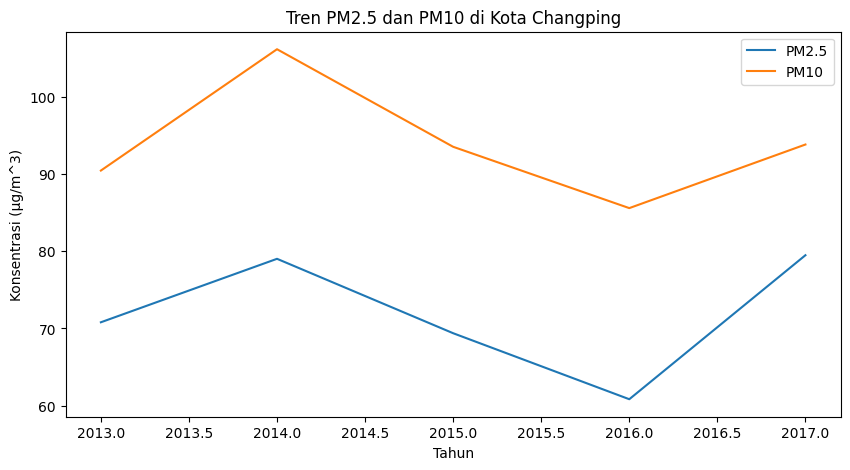

In [32]:
# Menampilkan visualisasi tren kualitas udara berdasarkan sumber polutan PM 2.5 dan PM 10 di kota changping pada tahun 2013 - 2017
changping_year = changping_data.groupby(by='year').agg({"PM2.5":["mean"], "PM10":["mean"]})
plt.figure(figsize=(10, 5))
plt.plot(changping_year.index, changping_year['PM2.5'], label='PM2.5')
plt.plot(changping_year.index, changping_year['PM10'], label='PM10')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m^3)')
plt.title('Tren PM2.5 dan PM10 di Kota Changping')
plt.legend()
plt.show()

Berdasarkan grafik yang dihasilkan diatas, didapatkan bahwa kualitas udara di Kota Changping berdasarkan sumber polutannya PM2.5 dan PM10 yakni :
1. Sumber polutan PM10 yang dihasilkan lebih tinggi dibandingkan PM2.5 setiap tahunnya.
2. Berdasarkan grafik diatas tren PM10 dan PM2.5 dikatakan linier, pada tahun 2013 - 2014 PM10 dan PM2.5 mengalami kenaikan. Kemudian pada tahun 2014 - 2016 PM10 dan PM2.5 mengalami penurunan, terakhir pada tahun 2016 - 2017 PM10 dan PM2.5 mengalami kenaikan kembali.

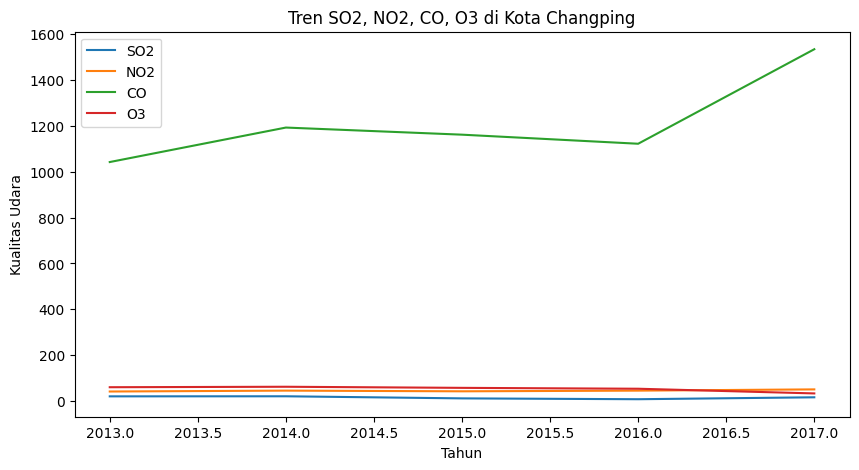

In [33]:
# Menampilkan visualisasi tren kualitas udara berdasarkan sumber polutan SO2, NO2, CO, O3 di kota changping pada tahun 2013 - 2017
changping_year_1 = changping_data.groupby(by='year').agg({"SO2":["mean"], "NO2":["mean"], "CO":["mean"], "O3":["mean"]})
plt.figure(figsize=(10, 5))
plt.plot(changping_year_1.index, changping_year_1['SO2'], label='SO2')
plt.plot(changping_year_1.index, changping_year_1['NO2'], label='NO2')
plt.plot(changping_year_1.index, changping_year_1['CO'], label='CO')
plt.plot(changping_year_1.index, changping_year_1['O3'], label='O3')
plt.xlabel('Tahun')
plt.ylabel('Kualitas Udara')
plt.title('Tren SO2, NO2, CO, O3 di Kota Changping')
plt.legend()
plt.show()

Berdasarkan Grafik yang dihasilkan diatas didapatkan perkembangan kualitas udara di Kota Changping berdasarkan sumber polutan SO2, NO2, CO, O3, yakni:
1. Bahwa CO yang dihasilkan lebih besar dibandingkan dengan SO2, NO2, dan O3.
2. Untuk sumber polutan SO2, NO2, dan O3 didapatkan berdasarkan grafik diatas bahwa perkembangan setiap tahun nya sama (kecuali O3 mengalami penurunan pada tahun 2016 - 2017).
3. Untuk sumber polutan CO, pada tahun 2013 - 2014 mengalami kenaikan, kemudian pada tahun 2014 - 2016 mengalami penurunan walaupun sedikit. Terakhir pada tahun 2016 - 2017 mengalami kenaikan.

### Bagaimana Kualitas Udara di Kota Shunyi setiap tahunnya?

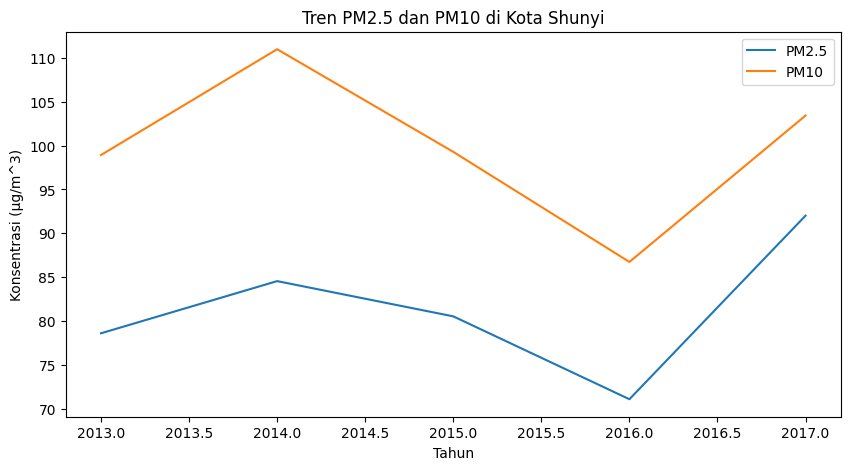

In [34]:
# Menampilkan visualisasi tren kualitas udara berdasarkan sumber polutan PM2.5 dan PM10 di kota shunyi pada tahun 2013 - 2017
shunyi_year = shunyi_data.groupby(by='year').agg({"PM2.5":["mean"], "PM10":["mean"]})
plt.figure(figsize=(10, 5))
plt.plot(shunyi_year.index, shunyi_year['PM2.5'], label='PM2.5')
plt.plot(shunyi_year.index, shunyi_year['PM10'], label='PM10')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m^3)')
plt.title('Tren PM2.5 dan PM10 di Kota Shunyi')
plt.legend()
plt.show()

Hampir sama dengan Kota Changping, Berdasarkan grafik yang dihasilkan diatas didapatkan bahwa kualitas udara di Kota Shunyi berdasarkan sumber polutannya PM2.5 dan PM10 yakni :
1. Sumber polutan PM10 yang dihasilkan lebih tinggi dibandingkan PM2.5 setiap tahunnya.
2. Berdasarkan grafik diatas tren PM10 dan PM2.5 dikatakan linier, pada tahun 2013 - 2014 PM10 dan PM2.5 mengalami kenaikan. Kemudian pada tahun 2014 - 2016 PM10 dan PM2.5 mengalami penurunan, terakhir pada tahun 2016 - 2017 PM10 dan PM2.5 mengalami kenaikan kembali.

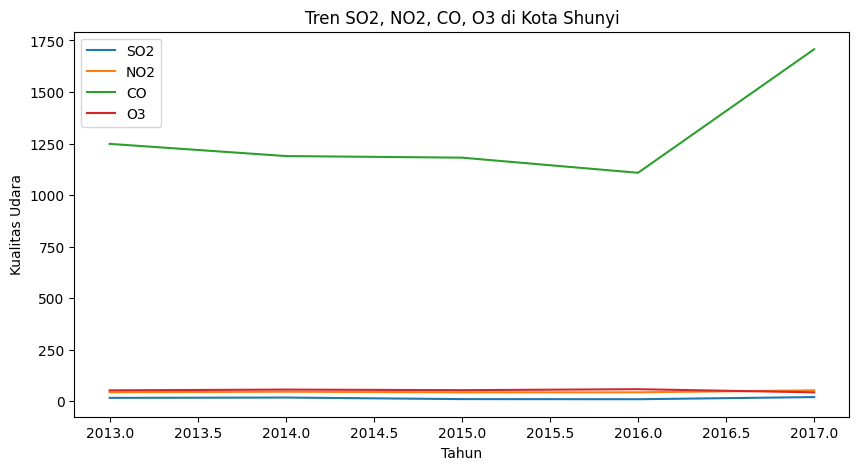

In [35]:
# Menampilkan visualisasi tren kualitas udara berdasarkan sumber polutan SO2, NO2, CO, O3 di kota shunyi pada tahun 2013 - 2017
shunyi_year_1 = shunyi_data.groupby(by='year').agg({"SO2":["mean"], "NO2":["mean"], "CO":["mean"], "O3":["mean"]})
plt.figure(figsize=(10, 5))
plt.plot(shunyi_year_1.index, shunyi_year_1['SO2'], label='SO2')
plt.plot(shunyi_year_1.index, shunyi_year_1['NO2'], label='NO2')
plt.plot(shunyi_year_1.index, shunyi_year_1['CO'], label='CO')
plt.plot(shunyi_year_1.index, shunyi_year_1['O3'], label='O3')
plt.xlabel('Tahun')
plt.ylabel('Kualitas Udara')
plt.title('Tren SO2, NO2, CO, O3 di Kota Shunyi')
plt.legend()
plt.show()

Berdasarkan Grafik yang dihasilkan diatas didapatkan perkembangan kualitas udara di Kota Shunyi berdasarkan sumber polutan SO2, NO2, CO, O3, yakni:
1. Bahwa CO yang dihasilkan lebih besar dibandingkan dengan SO2, NO2, dan O3.
2. Untuk sumber polutan SO2, NO2, dan O3 didapatkan berdasarkan grafik diatas bahwa perkembangan setiap tahun nya sama (kecuali O3 mengalami penurunan pada tahun 2016 - 2017).
3. Untuk sumber polutan CO, pada tahun 2013 - 2016 mengalami penurunan, kemudian pada tahun 2016 - 2017 terjadi kenaikan yang tinggi.

### Apa sumber polutan tertinggi yang dihasilkan di Kota Changping?

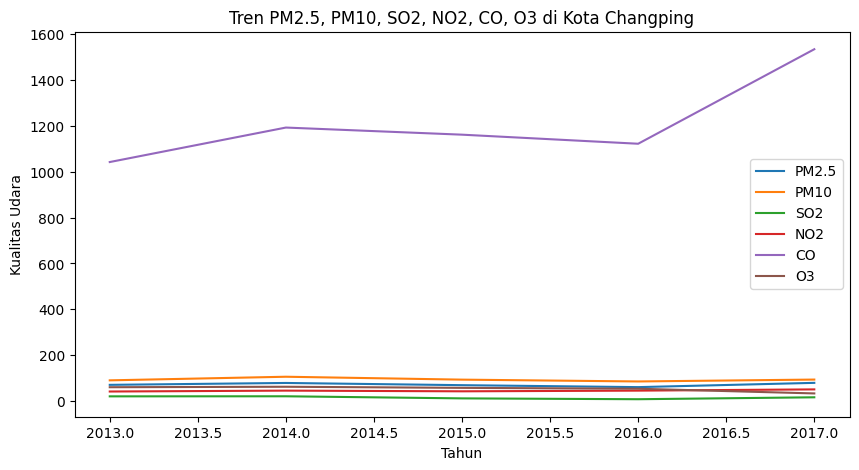

In [36]:
# Menampilkan visualisasi sumber polutan tertinggi yang dihasilkan di kota changping pada tahun 2013 - 2017
changping_year_2 = changping_data.groupby(by='year').agg({"PM2.5":["mean"], "PM10":["mean"], "SO2":["mean"], "NO2":["mean"], "CO":["mean"], "O3":["mean"]})
plt.figure(figsize=(10, 5))
plt.plot(changping_year_2.index, changping_year_2['PM2.5'], label='PM2.5')
plt.plot(changping_year_2.index, changping_year_2['PM10'], label='PM10')
plt.plot(changping_year_2.index, changping_year_2['SO2'], label='SO2')
plt.plot(changping_year_2.index, changping_year_2['NO2'], label='NO2')
plt.plot(changping_year_2.index, changping_year_2['CO'], label='CO')
plt.plot(changping_year_2.index, changping_year_2['O3'], label='O3')
plt.xlabel('Tahun')
plt.ylabel('Kualitas Udara')
plt.title('Tren PM2.5, PM10, SO2, NO2, CO, O3 di Kota Changping')
plt.legend()
plt.show()

Berdasarkan grafik yang didapatkan, bahwa sumber polutan yang tertinggi di Kota Changping dihasilkan oleh CO (Karbon monoksida).

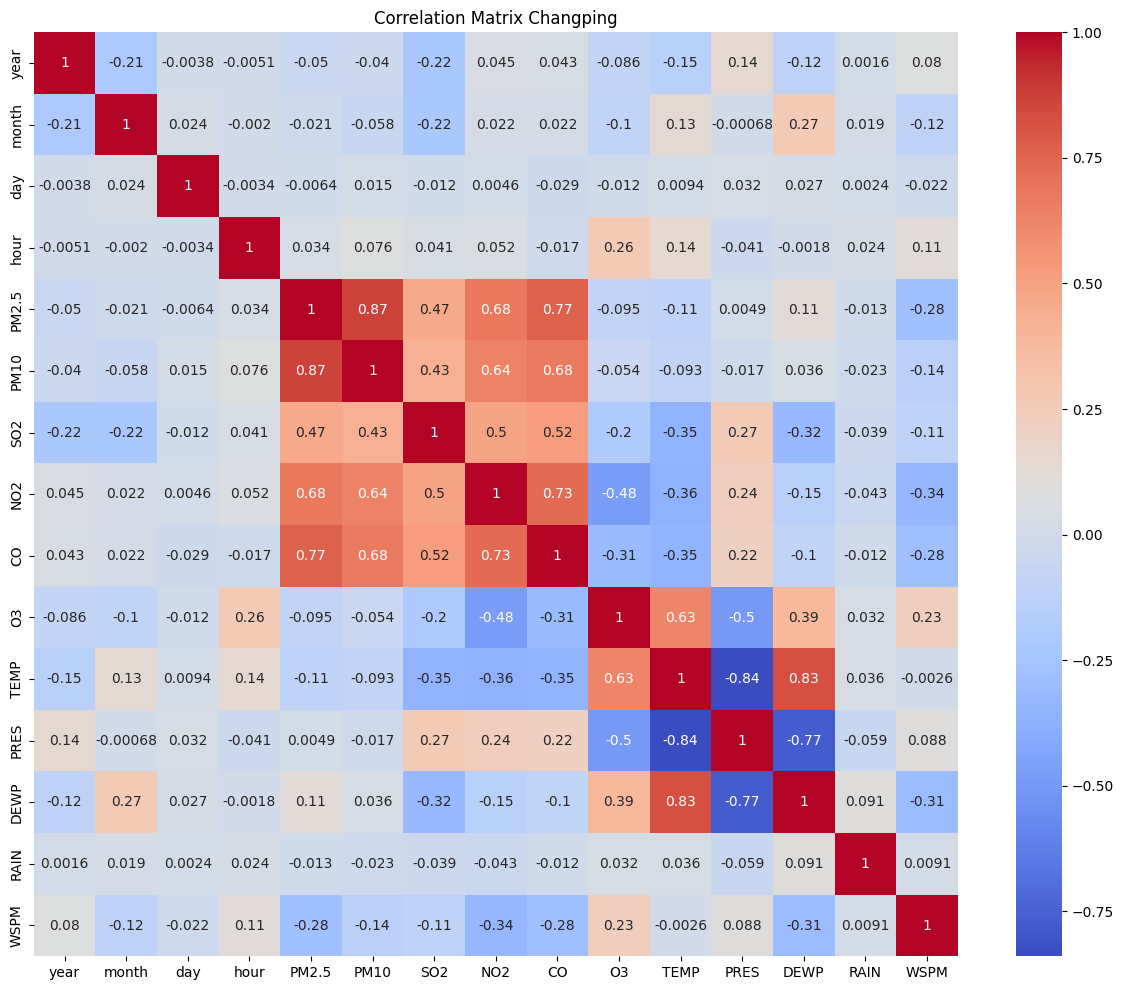

In [37]:
# Menampilkan Korelasi setiap kolom pada dataset changping
numeric_column = changping_data.select_dtypes(include=np.number).columns
corr_matrix = changping_data[numeric_column].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Changping')
plt.show()

Berikut matriks korelasi pada dataset Kota Changping, didapatkan sebelumnya bahwa CO (Karbon monooksida) merupakan sumber polutan tertinggi di Kota Changping. Akan tetapi, bukan berarti jika hanya menangani CO akan mengurangi polutan di Kota Changping dikarenakan polutan lainnya seperti PM2.5, PM10, SO2, NO2, O3 jika tidak dikendalikan juga maka akan mengalami peningkatan dan korelasi antar polutan linear yang akan mengakibatkan CO juga naik.

### Apa sumber polutan tertinggi yang dihasilkan di Kota Changping?

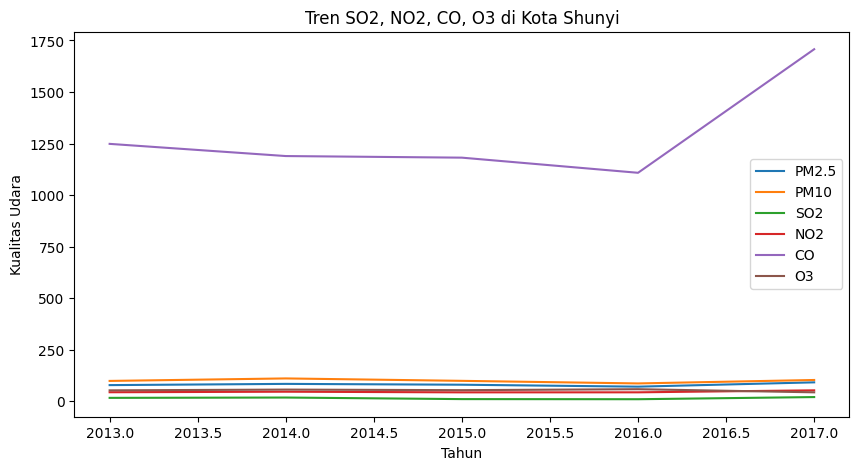

In [38]:
# Menampilkan visualisasi sumber polutan tertinggi di Kota Shunyi pada tahun 2013 - 2017
shunyi_year_2 = shunyi_data.groupby(by='year').agg({"PM2.5":["mean"], "PM10":["mean"], "SO2":["mean"], "NO2":["mean"], "CO":["mean"], "O3":["mean"]})
plt.figure(figsize=(10, 5))
plt.plot(shunyi_year_2.index, shunyi_year_2['PM2.5'], label='PM2.5')
plt.plot(shunyi_year_2.index, shunyi_year_2['PM10'], label='PM10')
plt.plot(shunyi_year_2.index, shunyi_year_2['SO2'], label='SO2')
plt.plot(shunyi_year_2.index, shunyi_year_2['NO2'], label='NO2')
plt.plot(shunyi_year_2.index, shunyi_year_2['CO'], label='CO')
plt.plot(shunyi_year_2.index, shunyi_year_2['O3'], label='O3')
plt.xlabel('Tahun')
plt.ylabel('Kualitas Udara')
plt.title('Tren SO2, NO2, CO, O3 di Kota Shunyi')
plt.legend()
plt.show()

Bersamaan dengan Kota Changping, demikian kota shunyi yang dimana CO (Karbon monoksida) sebagai sumber polutan tertinggi.

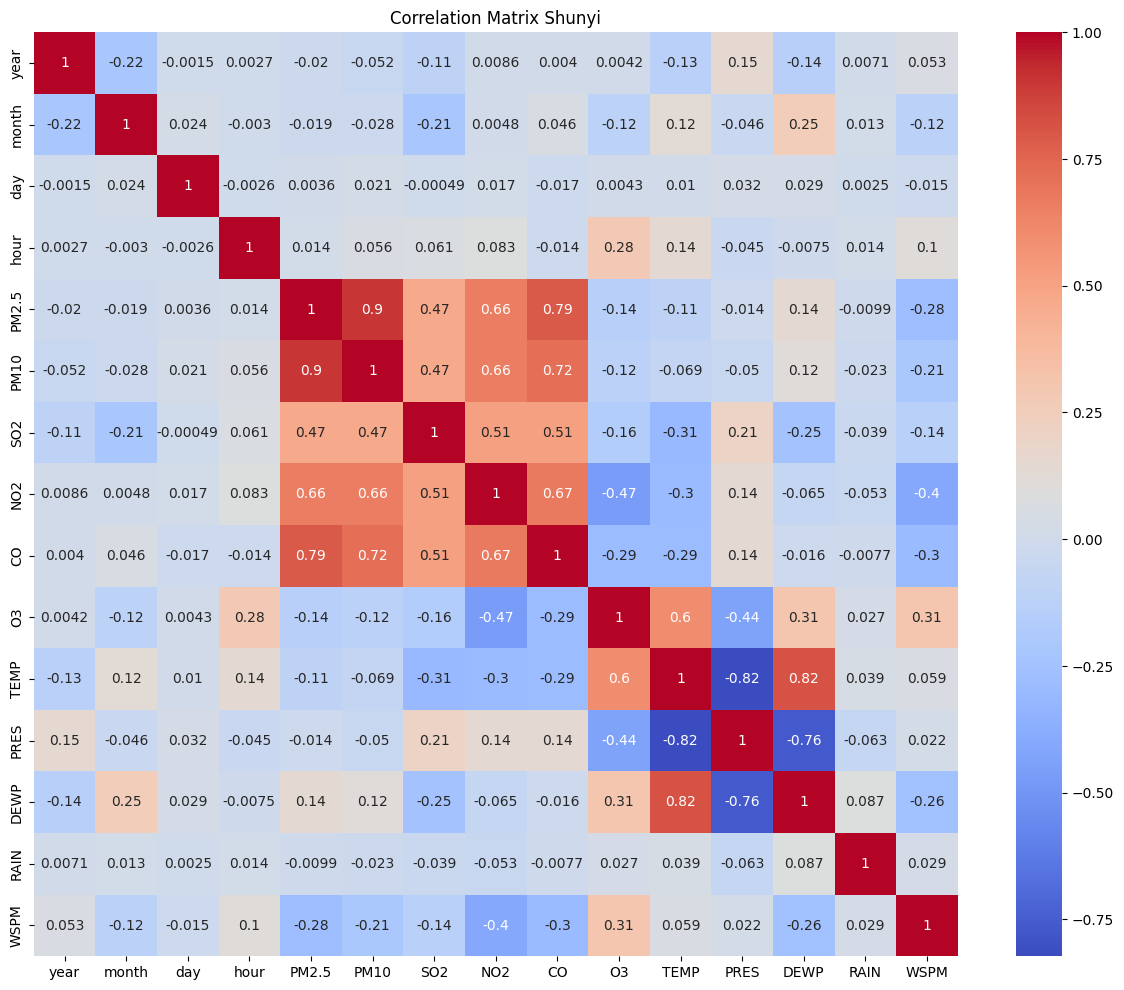

In [39]:
# Menampilkan Korelasi setiap kolom pada dataset shunyi
numeric_column = shunyi_data.select_dtypes(include=np.number).columns
corr_matrix_1 = shunyi_data[numeric_column].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Shunyi')
plt.show()

Berikut matriks korelasi pada dataset Kota Shunyi, didapatkan sebelumnya bahwa CO (Karbon monoksida) merupakan sumber polutan tertinggi di Kota Changping. Akan tetapi, bukan berarti jika hanya menangani CO akan mengurangi polutan di Kota Changping dikarenakan polutan lainnya seperti PM2.5, PM10, SO2, NO2, O3 jika tidak dikendalikan juga maka akan mengalami peningkatan dan korelasi antar polutan linear yang akan mengakibatkan CO juga naik.

### Berdasarkan informasi yang didapat sebelumnya dan geografisnya apakah ada persamaan dan perbedaan polusi udara yang terjadi di Kota Changping dan Shunyi?

In [40]:
# Import beberapa library
import folium
from folium.plugins import MarkerCluster

# membuat object map
m = folium.Map(location=[40.43, 116.23], zoom_start=10)

# Menambahkan cluster penanda ke peta
marker_cluster = MarkerCluster().add_to(m)

# Menetapkan batas wilayah kota changping dan kota shunyi
kota_changping = [
    [40.23, 116.13],
    [40.33, 116.13],
    [40.33, 116.33],
    [40.23, 116.33],
    [40.23, 116.13]
]

kota_shunyi = [
    [40.13, 116.43],
    [40.23, 116.43],
    [40.23, 116.63],
    [40.13, 116.63],
    [40.13, 116.43]
]

# Add polygons to the map to represent the district boundaries
folium.Polygon(kota_changping, color='blue', weight=2, opacity=0.5).add_to(m)
folium.Polygon(kota_shunyi, color='red', weight=2, opacity=0.5).add_to(m)

# Add markers to the map to represent notable locations
folium.Marker([40.28, 116.23], popup='Kota Changping').add_to(marker_cluster)
folium.Marker([40.18, 116.53], popup='Kota Shunyi').add_to(marker_cluster)

# Display the map
m

Berikut wilayah kota changping (kotak biru) dan kota shunyi (kotak merah). Berdasarkan wilayahnya kota changping dan kota shunyi berdekatan yang artinya polusi udara kedua kota ini tidak jauh berbeda. Akan tetapi, berdasarkan informasi sebelumnya yang telah didapat, bahwasannya kota shunyi memiliki polusi udara yang lebih buruk dibandingkan dengan kota changping.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


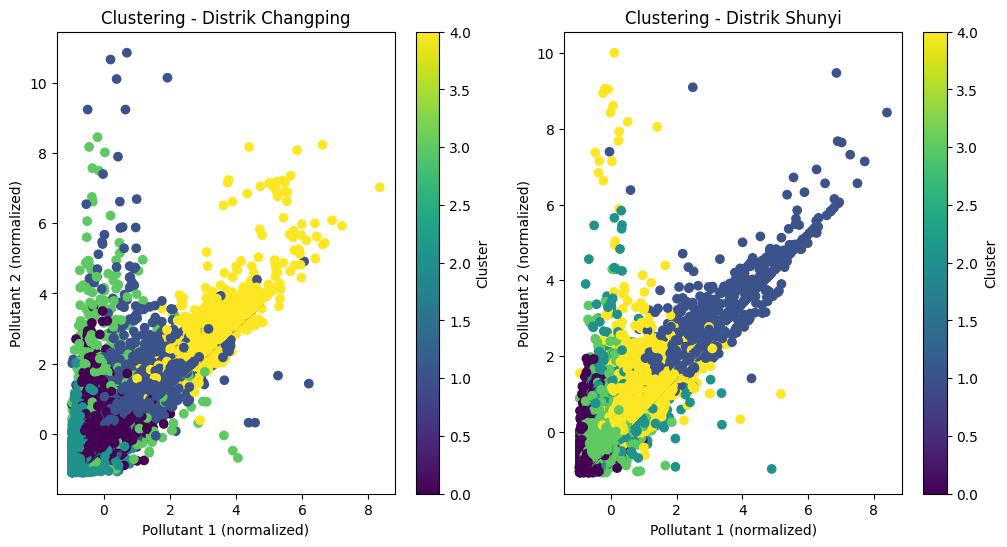

Cluster sizes (Distrik Changping):
cluster
2    14365
0     8327
1     4513
3     4259
4     1217
Name: count, dtype: int64

Cluster means (Distrik Changping):
              PM2.5        PM10        SO2         NO2           CO  \
cluster                                                               
0         67.511649   91.960586  13.943125   56.511060  1182.674673   
1        157.654686  189.312852  35.532285   82.364613  2386.656548   
2         21.819729   37.996693   6.395078   24.132851   501.921337   
3         90.509204  127.298075  10.404156   28.213407   941.714957   
4        267.290879  301.337716  65.391947  114.447001  4765.216105   

                 O3  
cluster              
0         25.103371  
1         24.144646  
2         59.641641  
3        161.287133  
4         12.339191  

Cluster sizes (Distrik Shunyi):
cluster
0    11629
3     9008
4     4624
2     3650
1     1283
Name: count, dtype: int64

Cluster means (Distrik Shunyi):
              PM2.5        PM10  

In [41]:
# Import beberapa libary
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih kolom yang akan digunakan untuk clustering
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Normalisasi data
scaler = StandardScaler()
distrik_changping_scaled = scaler.fit_transform(changping_data[pollutant_cols])
distrik_shunyi_scaled = scaler.fit_transform(shunyi_data[pollutant_cols])

# Clustering
kmeans = KMeans(n_clusters=5)
distrik_changping_clusters = kmeans.fit_predict(distrik_changping_scaled)
distrik_shunyi_clusters = kmeans.fit_predict(distrik_shunyi_scaled)
changping_data['cluster'] = distrik_changping_clusters
shunyi_data['cluster'] = distrik_shunyi_clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(distrik_changping_scaled[:, 0], distrik_changping_scaled[:, 1], c=distrik_changping_clusters)
plt.xlabel('Pollutant 1 (normalized)')
plt.ylabel('Pollutant 2 (normalized)')
plt.title('Clustering - Distrik Changping')
plt.colorbar(label='Cluster')

plt.subplot(1, 2, 2)
plt.scatter(distrik_shunyi_scaled[:, 0], distrik_shunyi_scaled[:, 1], c=distrik_shunyi_clusters)
plt.xlabel('Pollutant 1 (normalized)')
plt.ylabel('Pollutant 2 (normalized)')
plt.title('Clustering - Distrik Shunyi')
plt.colorbar(label='Cluster')

plt.show()


print("Cluster sizes (Distrik Changping):")
print(changping_data['cluster'].value_counts())

print("\nCluster means (Distrik Changping):")
print(changping_data.groupby('cluster')[pollutant_cols].mean())

print("\nCluster sizes (Distrik Shunyi):")
print(shunyi_data['cluster'].value_counts())

print("\nCluster means (Distrik Shunyi):")
print(shunyi_data.groupby('cluster')[pollutant_cols].mean())

Berikut cluster di kota changping dan kota shunyi berdasarkan PM2.5, PM10, SO2, NO2, dan CO.

## 6. Conclusion

- Kesimpulan Pertanyaan 1 :
1. Bahwa di Kota Changping terjadi tren kenaikan pada polutan PM2.5, PM10, dan CO mengalami peningkatan pada tahun 2013 - 2014. Kemudian terjadinya penurunan pada tahun 2014 - 2016 dan terjadi kenaikan lagi pada tahun 2016 - 2017.
2. Polutan SO2, NO2, dan O3 mengalami kesamaan di setiap tahun. Akan tetapi polutan O3 mengalami penurunan pada tahun 2016 - 2017.
- Kesimpulan Pertanyaan 2 :
1. Bahwa di Kota Shunyi, terjadi tren kenaikan pada polutan PM2.5, PM10 mengalami peningkatan pada tahun 2013 - 2014. Kemudian terjadinya penurunan pada tahun 2014 - 2016 dan terjadi kenaikan lagi pada tahun 2016 - 2017.
2. Polutan SO2, NO2, dan O3 mengalami kesamaan di setiap tahun. Akan tetapi polutan O3 mengalami penurunan pada tahun 2016 - 2017.
3. Khusus polutan CO mengalami penurunan pada tahun 2013 - 2016 dan mengalami penaikan pada tahun 2016 - 2017.
- Kesimpulan Pertanyaan 3 dan 4 :
1. Sumber polutan tertinggi di Kota Changping dan Kota Shunyi dihasilkan oleh CO (Karbon monoksida) yang biasanya berasal dari Kendaraan bertenaga diesel atau bensin, Mesin bensin kecil seperti mesin pemotong rumput atau pemangkas tali, Kompor yang membakar kayu dan arang, Kompor gas atau kompor, serta oven gas,Ketel Uap, Ventilasi pengering, Cerobong, Generator, Sistem pemanas tungku gas.
2. Pada matriks korelasi pada dataset Kota Shunyi, didapatkan sebelumnya bahwa CO (Karbon monoksida) merupakan sumber polutan tertinggi di Kota Changping. Akan tetapi, bukan berarti jika hanya menangani CO akan mengurangi polutan di Kota Changping dikarenakan polutan lainnya seperti PM2.5, PM10, SO2, NO2, O3 jika tidak dikendalikan juga maka akan mengalami peningkatan dan korelasi antar polutan linear yang akan mengakibatkan CO juga naik.
- Kesimpulan Pertanyaan 5 :
Bahwa Berdasarkan wilayahnya kota changping dan kota shunyi berdekatan yang artinya polusi udara kedua kota ini tidak jauh berbeda. Akan tetapi, berdasarkan informasi sebelumnya yang telah didapat, bahwasannya kota shunyi memiliki polusi udara yang lebih buruk dibandingkan dengan kota changping.

In [42]:
# Menggabungkan dataset changping dan dataset shunyi
combined_data = pd.concat([changping_data, shunyi_data], ignore_index=True)
combined_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,cluster
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00,2
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00,2
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00,2
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00,2
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62870,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi,2017-02-28 19:00:00,3
62871,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi,2017-02-28 20:00:00,3
62872,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi,2017-02-28 21:00:00,0
62873,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi,2017-02-28 22:00:00,0


In [43]:
# Mengimport dataset gabungan kedalam csv
combined_data.to_csv('all_data.csv', index=False)

In [44]:
# Menghubungkan google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Install library pipreqs
!pip install pipreqs

In [46]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Demo_1" --scan-notebooks